In [80]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод**

In [42]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [43]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [44]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [45]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [46]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [47]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [48]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)

In [49]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.5       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

In [50]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

In [51]:
reg_list = [0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
reg_list

[0, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]

In [52]:
# reg_list = np.logspace(-8, 2, 10)

In [53]:
w_list = []
for el in reg_list:
    W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=el)
    w_list.append(W)

Iter: 0, weights: [ 1.93018202  0.86710362 -0.57707002  1.42543417], error 3410.8965940196626
Iter: 500, weights: [23.49965177  5.30225055 -7.02694339 19.07517603], error 39.4795571983075
Iter: 1000, weights: [28.23376463  6.10971679 -5.89849823 16.39375602], error 33.037796007549524
Iter: 1500, weights: [31.66769679  6.21603955 -4.59493866 14.43312503], error 29.54181010169474
Iter: 2000, weights: [34.2463311   6.24353308 -3.56309565 12.95912552], error 27.54965723600692
Iter: 2500, weights: [36.19228623  6.25875941 -2.77883319 11.8465981 ], error 26.41335211451232
Iter: 3000, weights: [37.66180407  6.26967826 -2.185999   11.00643707], error 25.765202365073794
Iter: 3500, weights: [38.77163913  6.2778638  -1.73820686 10.37191392], error 25.395496869035934
Iter: 4000, weights: [39.60983938  6.28403954 -1.40000647  9.89269163], error 25.184616351276414
Iter: 4500, weights: [40.24288926  6.28870309 -1.1445803   9.53075947], error 25.06432981712141
Final MSE: 24.995718214433836
Iter: 0, w

Iter: 3000, weights: [ 6.31330114  0.71544684  0.3759989  10.95305481], error 1037.1616579116062
Iter: 3500, weights: [ 6.31330114  0.71544684  0.3759989  10.95305481], error 1037.1616579116062
Iter: 4000, weights: [ 6.31330114  0.71544684  0.3759989  10.95305481], error 1037.1616579116062
Iter: 4500, weights: [ 6.31330114  0.71544684  0.3759989  10.95305481], error 1037.1616579116062
Final MSE: 1037.1616579116062


In [54]:
w_list

[array([40.72017115,  6.29221905, -0.95200411,  9.25788418]),
 array([40.722376  ,  6.29221681, -0.95109126,  9.25661869]),
 array([40.70526718,  6.29192442, -0.95778536,  9.26635604]),
 array([40.63745021,  6.28976168, -0.98305835,  9.30468653]),
 array([40.37286227,  6.27122052, -1.0689555 ,  9.45153714]),
 array([37.48773611,  6.08791623, -2.02850692, 11.05701648]),
 array([25.46037462,  4.69461789, -5.16816582, 17.50958648]),
 array([14.75108469,  1.1406821 , -3.01804975, 20.21963115]),
 array([ 6.31330114,  0.71544684,  0.3759989 , 10.95305481])]

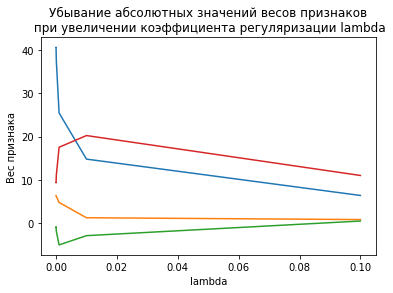

In [55]:
plt.plot(reg_list, w_list)

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации lambda')
plt.xlabel('lambda')
plt.ylabel('Вес признака');

##### При увеличении lambda веса признаков стремятся к нулю. При равным к нулю lambda  веса признаков имеют большие значения. Скорость стремления к нулю для каждого из признаков разные, следовательно можно занулять ненужные признаки и уменьшить количество переменных.

**2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.**

In [56]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W/np.abs(W) # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [57]:
W = gradient_descent_reg_l1(X_st, y, iterations=5000)

Iter: 0, weights: [ 0.1345531  -1.22050622  0.09912312  1.02945931], error 3156.0202915843083
Iter: 500, weights: [ 4.61445827 -0.40978918  0.77786599  9.16980787], error 1374.7797367862142
Iter: 1000, weights: [ 7.61340415 -0.05558887  0.91861688 14.33479266], error 645.5659324019532
Iter: 1500, weights: [ 9.65766425  0.04429194  0.75612277 17.61318225], error 341.12102645738366
Iter: 2000, weights: [1.10825544e+01 1.21731091e-02 4.33286994e-01 1.96938980e+01], error 209.72970825966598
Iter: 2500, weights: [12.10232004 -0.07925344  0.03580932 21.01308922], error 149.9460731310672
Iter: 3000, weights: [12.85435357 -0.18796633 -0.38604505 21.84707403], error 120.57546143655233
Iter: 3500, weights: [13.42718492 -0.29070435 -0.80383035 22.37107794], error 104.66886549979071
Iter: 4000, weights: [13.87821179 -0.37555291 -1.20236757 22.69635932], error 95.09691408793161
Iter: 4500, weights: [14.24494101 -0.43733777 -1.57444029 22.89367892], error 88.75186771205342
Final MSE: 84.204676072528

**3. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

In [58]:
X_norm_st = X_norm.copy().astype(np.float64)
X_norm_st[:, 1] = standart_scale(X_norm_st[:, 1])
X_norm_st[:, 2] = standart_scale(X_norm_st[:, 2])
X_norm_st

array([[ 1.00000000e+00, -7.07106781e-01, -9.79589689e-01,
         1.00000000e+00],
       [ 1.00000000e+00, -7.07106781e-01, -5.67130873e-01,
         1.00000000e+00],
       [ 1.00000000e+00, -3.53553391e-01, -4.64016169e-01,
         2.00000000e+00],
       [ 1.00000000e+00,  7.07106781e-01, -7.73360281e-01,
         1.00000000e+00],
       [ 1.00000000e+00, -1.96261557e-16,  9.79589689e-01,
         2.00000000e+00],
       [ 1.00000000e+00, -1.06066017e+00, -3.60901465e-01,
         1.00000000e+00],
       [ 1.00000000e+00,  7.07106781e-01,  1.08270439e+00,
         3.00000000e+00],
       [ 1.00000000e+00,  2.47487373e+00,  2.11385144e+00,
         3.00000000e+00],
       [ 1.00000000e+00, -7.07106781e-01, -1.08270439e+00,
         1.00000000e+00],
       [ 1.00000000e+00, -3.53553391e-01,  5.15573521e-02,
         2.00000000e+00]])

In [59]:
max(X_norm_st[:, 1])

2.4748737341529163

In [60]:
min(X_norm_st[:, 1])

-1.0606601717798214

-1.4988010832439614e-16


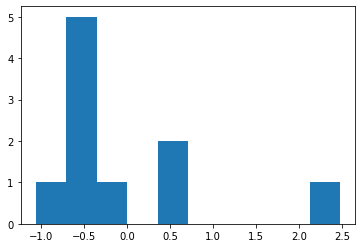

In [61]:
print(np.mean(X_norm_st[:, 1]))
plt.hist(X_norm_st[:, 1])
plt.show()

In [62]:
X_st_norm = X_st.copy().astype(np.float64)
X_st_norm[:, 1] = min_max_scale(X_st_norm[:, 1])
X_st_norm[:, 2] = min_max_scale(X_st_norm[:, 2])
X_st_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.5       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

0.30000000000000004


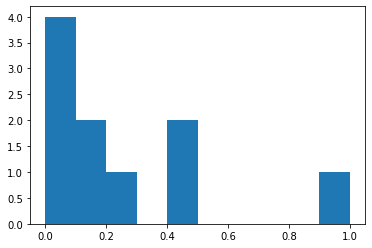

In [63]:
print(np.mean(X_st_norm[:, 1]))
plt.hist(X_st_norm[:, 1])
plt.show()

In [64]:
max(X_st_norm[:, 1])

1.0

In [65]:
min(X_st_norm[:, 1])

0.0

##### Одновременного эффекта стандартизация и нормализация не дают

**4. Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.**

In [66]:
from sklearn import datasets

In [67]:
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10
# display(X, Y, coef)

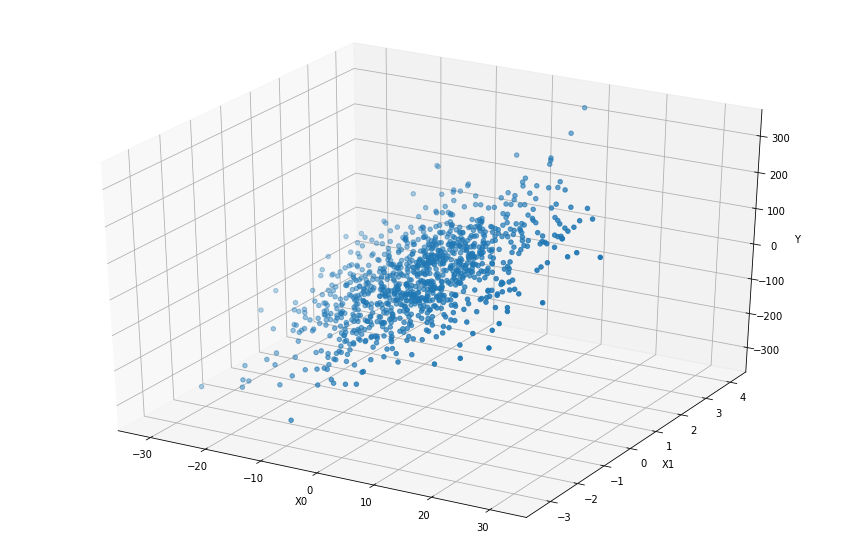

In [68]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [69]:
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        errors.append(err)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors

In [70]:
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    errors = []
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
        

            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        iter_mse = calc_mse(y, np.dot(X, W))
        errors.append(iter_mse)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors

In [71]:
X_st = X.copy().astype(np.float64)
X_st[:, 0] = standart_scale(X_st[:, 0])
X_st[:, 1] = standart_scale(X_st[:, 1])
# X_st

In [72]:
%%time
W_gd = gradient_descent(X_st, Y, iterations=5000, eta=1e-3)

Iter: 0, weights: [ 0.12769868 -0.5658438 ], error 8282.833307671732
Iter: 500, weights: [38.29090767 42.03688476], error 1206.9869272103965
Iter: 1000, weights: [52.69945671 58.03798563], error 204.16662372535384
Iter: 1500, weights: [58.13867182 64.04848356], error 62.03882256619683
Iter: 2000, weights: [60.19170487 66.30644813], error 41.89484986255919
Iter: 2500, weights: [60.9665275  67.15478414], error 39.03975563855084
Iter: 3000, weights: [61.2589145  67.47354197], error 38.63508271028077
Iter: 3500, weights: [61.36923744 67.59332471], error 38.57772451568214
Iter: 4000, weights: [61.41085993 67.63834063], error 38.56959445647696
Iter: 4500, weights: [61.42656165 67.65525965], error 38.568442069819035
Final MSE: 38.568278723845
Wall time: 256 ms


In [73]:
%%time
W_sgd = stohastic_gradient_descent(X_st, Y, batch_size=1, iterations=5000, eta=1e-3)

amount of batches is 1000
Iter: 0, weights: [52.54446528 57.97764203], error 23.71221690042231
Iter: 500, weights: [61.33183857 67.58432613], error 78.60998715552651
Iter: 1000, weights: [61.33183857 67.58432613], error 78.60998715552651
Iter: 1500, weights: [61.33183857 67.58432613], error 78.60998715552651
Iter: 2000, weights: [61.33183857 67.58432613], error 78.60998715552651
Iter: 2500, weights: [61.33183857 67.58432613], error 78.60998715552651
Iter: 3000, weights: [61.33183857 67.58432613], error 78.60998715552651
Iter: 3500, weights: [61.33183857 67.58432613], error 78.60998715552651
Iter: 4000, weights: [61.33183857 67.58432613], error 78.60998715552651
Iter: 4500, weights: [61.33183857 67.58432613], error 78.60998715552651
Final MSE: 38.58528861089424
Wall time: 1min 44s


Text(0, 0.5, 'MSE')

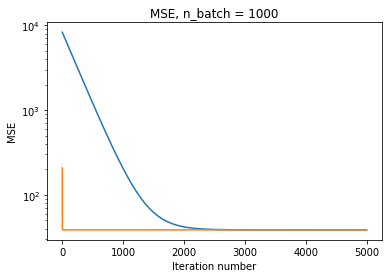

In [74]:
plt.plot(range(len(W_gd[1])), W_gd[1])
plt.plot(range(len(W_sgd[1])), W_sgd[1])
plt.title('MSE, n_batch = 1000')
plt.yscale('log')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [75]:
%%time
W_sgd = stohastic_gradient_descent(X_st, Y, batch_size=100, iterations=5000, eta=1e-3)

amount of batches is 10
Iter: 0, weights: [1.02640914 0.46675437], error 7213.4200228966765
Iter: 500, weights: [61.43179574 67.66091795], error 37.448796747014924
Iter: 1000, weights: [61.43532824 67.66468969], error 37.45317529236171
Iter: 1500, weights: [61.43532845 67.6646899 ], error 37.45317554279916
Iter: 2000, weights: [61.43532845 67.6646899 ], error 37.453175542813426
Iter: 2500, weights: [61.43532845 67.6646899 ], error 37.453175542813426
Iter: 3000, weights: [61.43532845 67.6646899 ], error 37.453175542813426
Iter: 3500, weights: [61.43532845 67.6646899 ], error 37.453175542813426
Iter: 4000, weights: [61.43532845 67.6646899 ], error 37.453175542813426
Iter: 4500, weights: [61.43532845 67.6646899 ], error 37.453175542813426
Final MSE: 38.56825284715862
Wall time: 1.29 s


Text(0, 0.5, 'MSE')

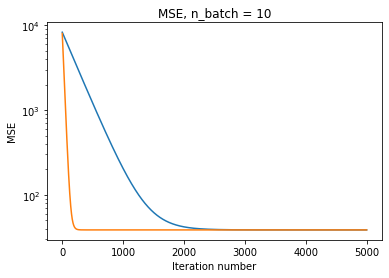

In [76]:
plt.plot(range(len(W_gd[1])), W_gd[1])
plt.plot(range(len(W_sgd[1])), W_sgd[1])
plt.title('MSE, n_batch = 10')
plt.yscale('log')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

In [77]:
%%time
W_sgd = stohastic_gradient_descent(X_st, Y, batch_size=1000, iterations=5000, eta=1e-3)

amount of batches is 1
Iter: 0, weights: [-0.17976236  0.19969547], error 8217.756612404319
Iter: 500, weights: [38.18469028 42.31557583], error 1197.8535814650756
Iter: 1000, weights: [52.66288875 58.13949266], error 202.8837067200446
Iter: 1500, weights: [58.12613186 64.0854741 ], error 61.85847760226426
Iter: 2000, weights: [60.18742405 66.31993498], error 41.86947986670742
Iter: 2500, weights: [60.96507378 67.15970407], error 39.03618436271981
Iter: 3000, weights: [61.25842386 67.4753377 ], error 38.63457968447365
Iter: 3500, weights: [61.36907305 67.59398048], error 38.5776536232667
Iter: 4000, weights: [61.41080533 67.63858024], error 38.569584460341396
Iter: 4500, weights: [61.42654371 67.65534725], error 38.56844065965712
Final MSE: 38.568278524826574
Wall time: 333 ms


Text(0, 0.5, 'MSE')

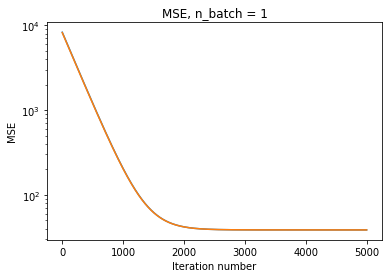

In [78]:
plt.plot(range(len(W_gd[1])), W_gd[1])
plt.plot(range(len(W_sgd[1])), W_sgd[1])
plt.title('MSE, n_batch = 1')
plt.yscale('log')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

##### Когда learning rate одинаковые, SGD сходится за меньшее количество итераций, чем GD.
##### От количества батчей у SGD изменяется скорость сходимости и время на вычисления:

- при n = 1 сходимость за итерацию SGD повторяет сходимость GD и по времени вычисления приближается к GD.
- при увеличении кол-ва батчей вплоть до n = len(X) сходимость за итерацию начинает значительно обгонять   GD, но время вычисления значительно возрастает